In [1]:
import sympy as sp
#from sympy.abc import k,s,t,x,y,alpha,beta,w
sp.init_printing()

In [2]:
#t=1
L = k*sp.log(x) + s*sp.log(y) - sp.log(t - x*(y**t)/(sp.log(y)))
sp.simplify(sp.solve(sp.diff(L,y),s)[0]/(sp.solve(sp.diff(L,x),k))[0]) , sp.simplify((t*sp.log(y) - 1) / (t*sp.log(y)))

NameError: name 'k' is not defined

In [ ]:
L = k*sp.log(x) + s*sp.log(y) + sp.log((1-y)/(1-y+x*y))
L = k*sp.log(x) + s*sp.log(y) + sp.log((1-y)/(1-y+x*y))
sp.solve(sp.diff(L,x),k)

In [ ]:
al
H = (alpha*sp.Heaviside(w-t) + beta*w*sp.Heaviside(w-t)).rewrite(sp.Piecewise)
Z = sp.integrate(sp.exp(-H),(w,0,sp.oo))
Z

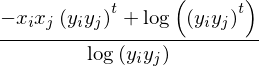

In [3]:
aij=sp.Symbol('a_{ij}', positive=True,real=True)
wij=sp.Symbol('w_{ij}', positive=True,real=True)
t = sp.Symbol('t', positive=True,real=True)
alphai = sp.Symbol('\\alpha_i',positive=True,real=True)
alphaj = sp.Symbol('\\alpha_j',positive=True,real=True)
betai = sp.Symbol('\\beta_i',positive=True,real=True)
betaj = sp.Symbol('\\beta_j',positive=True,real=True)

xi = sp.Symbol('x_i',positive=True,real=True)
xj = sp.Symbol('x_j',positive=True,real=True)
yi = sp.Symbol('y_i',positive=True,real=True)
yj = sp.Symbol('y_j',positive=True,real=True)

H = ((alphai+alphaj)*sp.Heaviside(wij-t) + (betai+betaj)*wij*sp.Heaviside(wij-t))
#H = H.replace(betai,-sp.log(yi)).replace(betaj,-sp.log(yj)).replace(alphai,-sp.log(xi)).replace(alphaj,-sp.log(xj))
#Z = sp.summation(sp.exp(-H),(wij,0,sp.oo))
Z = sp.simplify(sp.integrate(sp.exp(-H.rewrite(sp.Piecewise)), (wij,0,sp.oo)))
Z = sp.simplify(Z.replace(betai,-sp.log(yi)).replace(betaj,-sp.log(yj)).replace(alphai,-sp.log(xi)).replace(alphaj,-sp.log(xj)))
Z

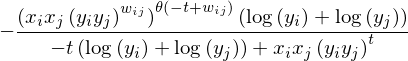

In [4]:
P = sp.simplify(sp.exp(-H.replace(betai,-sp.log(yi)).replace(betaj,-sp.log(yj)).replace(alphai,-sp.log(xi)).replace(alphaj,-sp.log(xj)))/Z)
sp.expand_log(P)

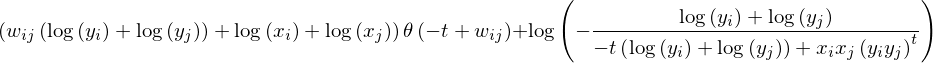

In [5]:
sp.expand_log(sp.log(P))

In [ ]:
sp.latex(sp.expand_log(sp.log(P)))

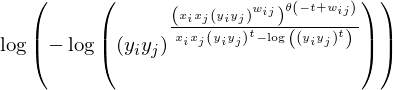

In [7]:
loglike = sp.simplify(sp.log(P))
sp.simplify(loglike.replace(betai,-sp.log(yi)).replace(betaj,-sp.log(yj)).replace(alphai,-sp.log(xi)).replace(alphaj,-sp.log(xj)))

In [ ]:
sp.simplify(sp.log(-(sp.log(yi*yj)/(-t*(sp.log(yi*yj))+xi*xj*((yi*yj)**t)))))

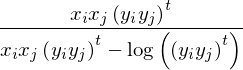

In [8]:
F = -sp.log(sp.expand_log(Z))
dalphai=-sp.log(xi)
dbetai=-sp.log(yi)
sp.simplify(sp.diff(F,xi)*sp.diff(sp.exp(-alphai),alphai)).replace(sp.exp(-alphai),xi)

In [ ]:
sp.simplify((sp.simplify(sp.diff(F,yi)*sp.diff(sp.exp(-betai),betai)).replace(sp.exp(-betai),yi)) / (sp.simplify(sp.diff(F,xi)*sp.diff(sp.exp(-alphai),alphai)).replace(sp.exp(-alphai),xi)))